# Principal Component Analysis with Cancer Data

In [66]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [123]:
dfCancer = pd.read_csv('breast-cancer-wisconsin-data.csv')
dfCancer.head(10)

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   
5  1017122               8         10          10                  8   
6  1018099               1          1           1                  1   
7  1018561               2          1           2                  1   
8  1033078               2          1           1                  1   
9  1033078               4          2           1                  1   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   
5                            7          10                9                7   
6                            2          10                3                1   
7                            2           1                3                1   
8                            2           1                1                1   
9                            2           1                2                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2  
5        1      4  
6        1      2  
7        1      2  
8        5      2  
9        1      2

In [41]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [42]:
dfCancer.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [43]:
# We could see "?" values in column, this should be removed from data set
dfCancer.isnull().any()
# Check for missing value in any other column

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [44]:
dfCancer.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [45]:
# No missing values foudnd. So let us try to remove ? from bare nuclei column
dataMiss = dfCancer[dfCancer['Bare Nuclei'] =='?']
# Get count of rows having ?
dataMiss.count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [46]:
dfCancer.head(5)

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [20]:
dfCancer.groupby('Bare Nuclei').describe()

ID                                                      \
             count          mean            std        min         25%   
Bare Nuclei                                                              
1            402.0  1.122871e+06  762148.155836   167528.0  1019485.00   
10           132.0  9.661622e+05  349771.830451    63375.0   748715.50   
2             30.0  1.111190e+06  197557.349639   378275.0  1115502.75   
3             28.0  1.049630e+06  224031.853037   314428.0   888745.75   
4             19.0  9.923646e+05  300806.638801   324427.0   813163.00   
5             30.0  1.046790e+06  311399.725962   128059.0   941148.00   
6              4.0  1.178771e+06   55755.483362  1112209.0  1152496.75   
7              8.0  1.022754e+06  248080.359239   476903.0  1009332.00   
8             21.0  1.010982e+06  360491.574262    76389.0  1106829.00   
9              9.0  1.040080e+06  340515.553185   145447.0  1105257.00   
?             16.0  8.575781e+05  395546.725883    61634.0   595517.25   

                                               ClumpThickness            ...  \
                   50%         75%         max          count      mean  ...   
Bare Nuclei                                                              ...   
1            1182404.0  1267454.50  13454352.0          402.0  3.072139  ...   
10           1145789.5  1220109.50   1371026.0          132.0  7.143939  ...   
2            1164976.0  1227122.50   1315807.0           30.0  4.766667  ...   
3            1111826.0  1192155.50   1334071.0           28.0  4.678571  ...   
4            1108449.0  1223549.50   1319609.0           19.0  6.210526  ...   
5            1178665.0  1227617.00   1350423.0           30.0  6.133333  ...   
6            1178156.0  1204430.00   1246562.0            4.0  7.750000  ...   
7            1078494.0  1185296.50   1230688.0            8.0  7.125000  ...   
8            1148278.0  1210963.00   1352848.0           21.0  6.523810  ...   
9            1147699.0  1171845.00   1242364.0            9.0  6.111111  ...   
?            1057040.0  1187050.75   1241232.0           16.0  3.375000  ...   

            Mitoses        Class                                               
                75%   max  count      mean       std  min  25%  50%  75%  max  
Bare Nuclei                                                                    
1              1.00  10.0  402.0  2.074627  0.379530  2.0  2.0  2.0  2.0  4.0  
10             3.00  10.0  132.0  3.954545  0.299201  2.0  4.0  4.0  4.0  4.0  
2              1.00  10.0   30.0  2.600000  0.932183  2.0  2.0  2.0  4.0  4.0  
3              2.00   7.0   28.0  3.000000  1.018350  2.0  2.0  3.0  4.0  4.0  
4              2.50  10.0   19.0  3.368421  0.955134  2.0  2.0  4.0  4.0  4.0  
5              2.00  10.0   30.0  3.333333  0.958927  2.0  2.0  4.0  4.0  4.0  
6              4.75  10.0    4.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
7              2.25   8.0    8.0  3.750000  0.707107  2.0  4.0  4.0  4.0  4.0  
8              1.00   7.0   21.0  3.809524  0.601585  2.0  4.0  4.0  4.0  4.0  
9              8.00  10.0    9.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
?              1.00   1.0   16.0  2.250000  0.683130  2.0  2.0  2.0  2.0  4.0  

[11 rows x 80 columns]

In [124]:
dfCancer.replace('?',1,inplace=True)

In [125]:
dfCancer[dfCancer['Bare Nuclei']=='?']

Empty DataFrame
Columns: [ID, ClumpThickness, Cell Size, Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Normal Nucleoli, Bland Chromatin, Mitoses, Class]
Index: []

In [59]:
print(dfCancer.dtypes)

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [126]:
#df["a"] = pd.to_numeric(df["a"])
dfCancer['Bare Nuclei']= pd.to_numeric(dfCancer['Bare Nuclei'])

In [61]:
dfCancer.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [127]:
#get description of data to visualise , remove ID column as it does not helps
dfCancer.drop(columns = 'ID',inplace=True)


In [64]:

dfCancer.describe().transpose()

count      mean       std  min  25%  50%  75%  \
ClumpThickness               699.0  4.417740  2.815741  1.0  2.0  4.0  6.0   
Cell Size                    699.0  3.134478  3.051459  1.0  1.0  1.0  5.0   
Cell Shape                   699.0  3.207439  2.971913  1.0  1.0  1.0  5.0   
Marginal Adhesion            699.0  2.806867  2.855379  1.0  1.0  1.0  4.0   
Single Epithelial Cell Size  699.0  3.216023  2.214300  1.0  2.0  2.0  4.0   
Bare Nuclei                  699.0  3.486409  3.621929  1.0  1.0  1.0  5.0   
Normal Nucleoli              699.0  3.437768  2.438364  1.0  2.0  3.0  5.0   
Bland Chromatin              699.0  2.866953  3.053634  1.0  1.0  1.0  4.0   
Mitoses                      699.0  1.589413  1.715078  1.0  1.0  1.0  1.0   
Class                        699.0  2.689557  0.951273  2.0  2.0  2.0  4.0   

                              max  
ClumpThickness               10.0  
Cell Size                    10.0  
Cell Shape                   10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size  10.0  
Bare Nuclei                  10.0  
Normal Nucleoli              10.0  
Bland Chromatin              10.0  
Mitoses                      10.0  
Class                         4.0

In [65]:
# Check for correlation of variable
dfCancer.corr()

ClumpThickness  Cell Size  Cell Shape  \
ClumpThickness                     1.000000   0.644913    0.654589   
Cell Size                          0.644913   1.000000    0.906882   
Cell Shape                         0.654589   0.906882    1.000000   
Marginal Adhesion                  0.486356   0.705582    0.683079   
Single Epithelial Cell Size        0.521816   0.751799    0.719668   
Bare Nuclei                        0.590008   0.686673    0.707474   
Normal Nucleoli                    0.558428   0.755721    0.735948   
Bland Chromatin                    0.535835   0.722865    0.719446   
Mitoses                            0.350034   0.458693    0.438911   
Class                              0.716001   0.817904    0.818934   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ClumpThickness                        0.486356                     0.521816   
Cell Size                             0.705582                     0.751799   
Cell Shape                            0.683079                     0.719668   
Marginal Adhesion                     1.000000                     0.599599   
Single Epithelial Cell Size           0.599599                     1.000000   
Bare Nuclei                           0.666971                     0.583701   
Normal Nucleoli                       0.666715                     0.616102   
Bland Chromatin                       0.603352                     0.628881   
Mitoses                               0.417633                     0.479101   
Class                                 0.696800                     0.682785   

                             Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
ClumpThickness                  0.590008         0.558428         0.535835   
Cell Size                       0.686673         0.755721         0.722865   
Cell Shape                      0.707474         0.735948         0.719446   
Marginal Adhesion               0.666971         0.666715         0.603352   
Single Epithelial Cell Size     0.583701         0.616102         0.628881   
Bare Nuclei                     1.000000         0.674215         0.574778   
Normal Nucleoli                 0.674215         1.000000         0.665878   
Bland Chromatin                 0.574778         0.665878         1.000000   
Mitoses                         0.342397         0.344169         0.428336   
Class                           0.818968         0.756616         0.712244   

                              Mitoses     Class  
ClumpThickness               0.350034  0.716001  
Cell Size                    0.458693  0.817904  
Cell Shape                   0.438911  0.818934  
Marginal Adhesion            0.417633  0.696800  
Single Epithelial Cell Size  0.479101  0.682785  
Bare Nuclei                  0.342397  0.818968  
Normal Nucleoli              0.344169  0.756616  
Bland Chromatin              0.428336  0.712244  
Mitoses                      1.000000  0.423170  
Class                        0.423170  1.000000

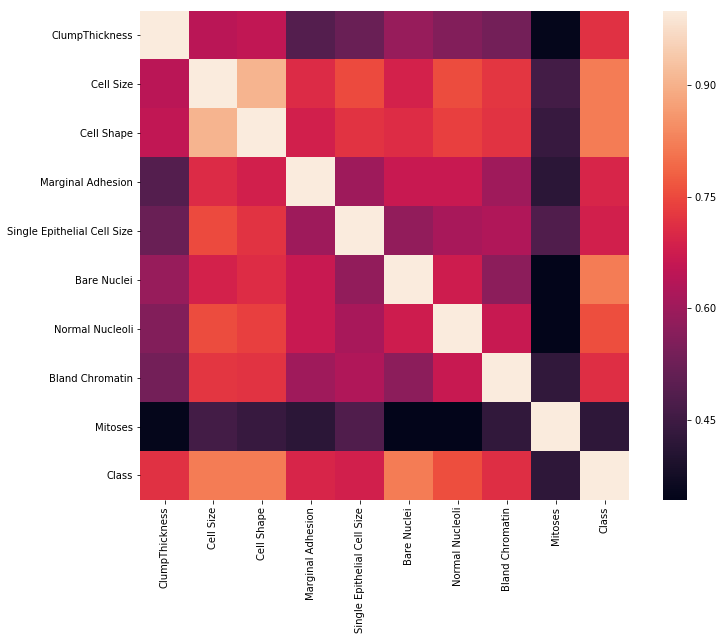

In [67]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
corrmat = dfCancer.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

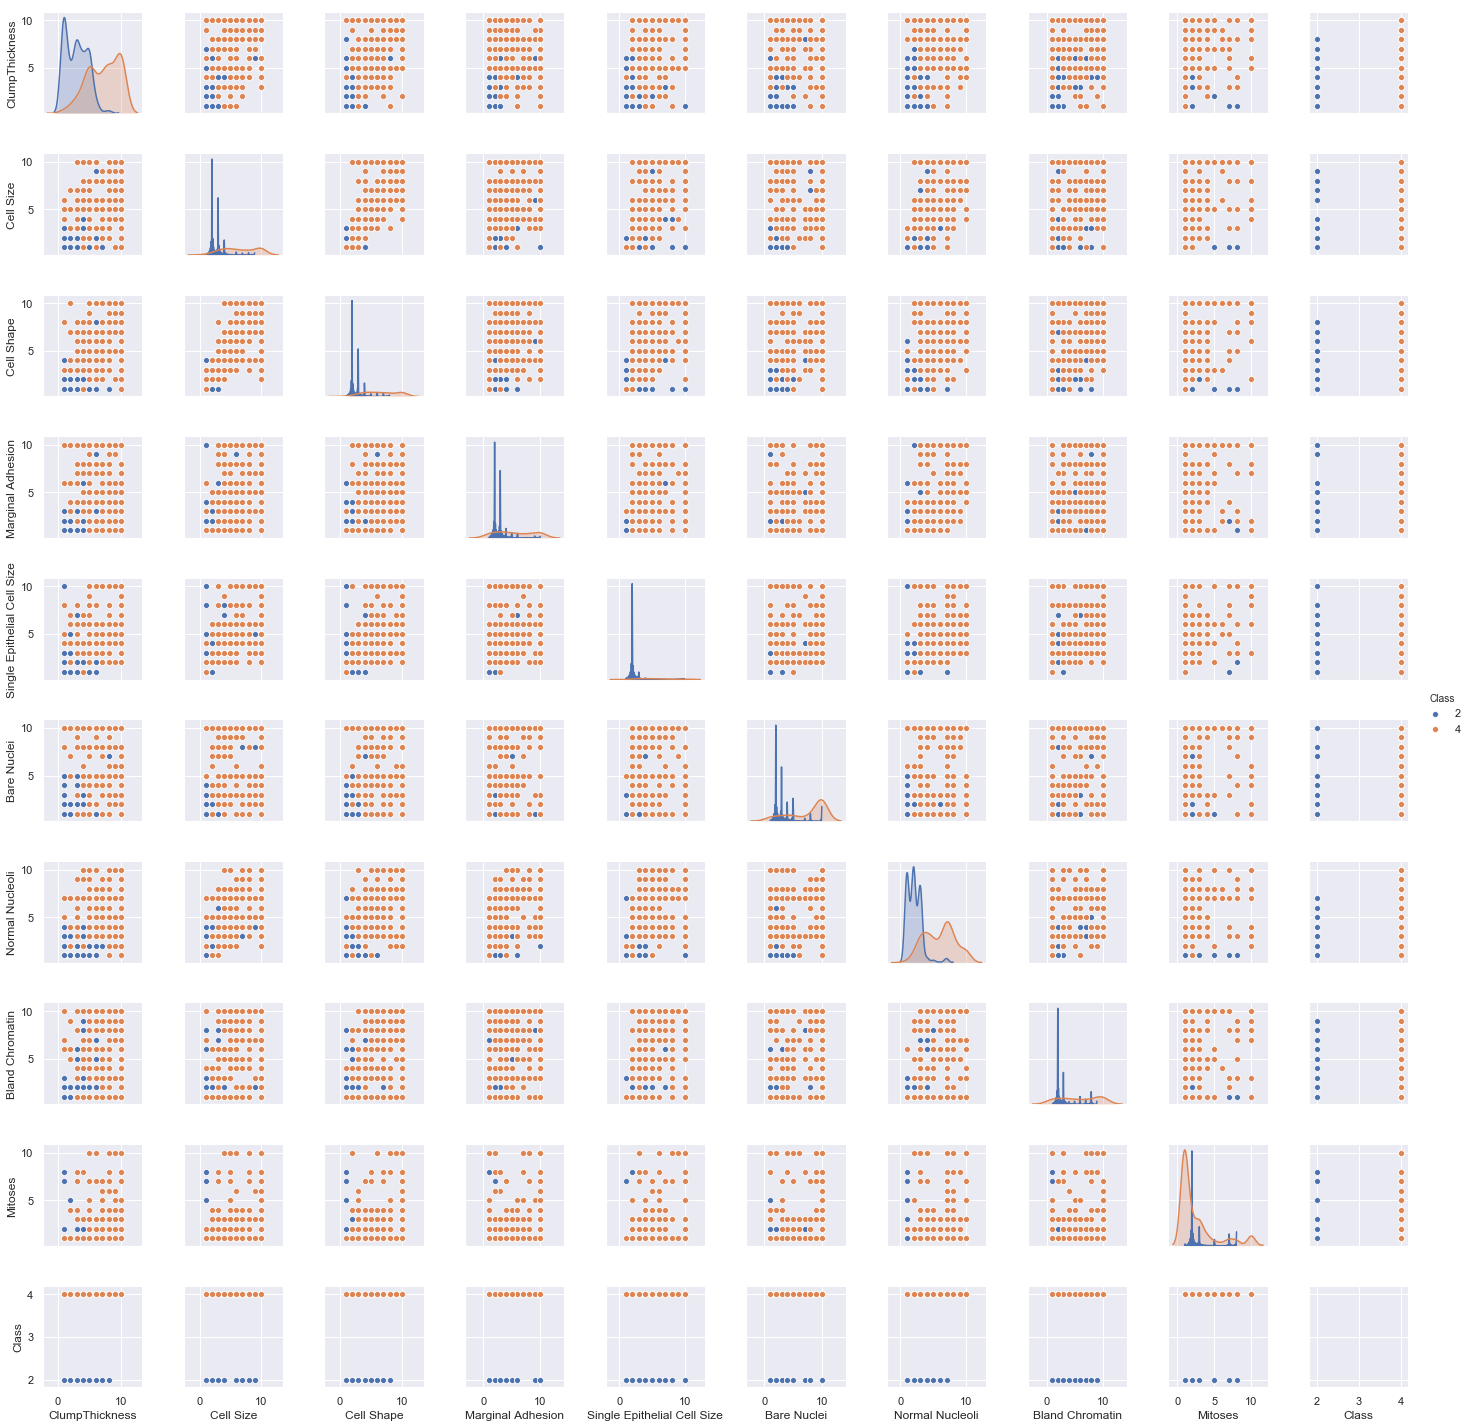

In [71]:
#Let us check for pair plots
sns.set()
sns.pairplot(dfCancer, hue ="Class",size = 2.0,diag_kind="kde")
plt.show()

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [128]:
dfCancer.groupby('Class').count()

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
Class                                                             
2                 458        458         458                458   
4                 241        241         241                241   

       Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
Class                                                              
2                              458          458              458   
4                              241          241              241   

       Bland Chromatin  Mitoses  
Class                            
2                  458      458  
4                  241      241

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [75]:
# We could see most of the outliers are now removed.
dfCancer.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

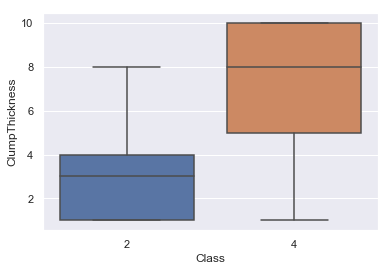

In [79]:
sns.boxplot(x="Class", y="ClumpThickness", data=dfCancer)#no outliers found for this field 

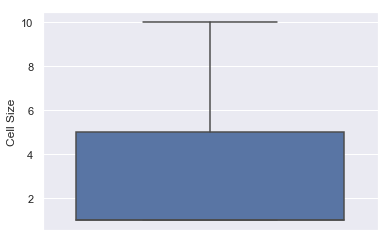

In [86]:
#Cell Size
sns.boxplot(y="Cell Size", data=dfCancer)

In [89]:
#z = np.abs(stats.zscore(boston_df))
#print(z)
z= np.abs(stats.zscore(dfCancer))

In [91]:
z= np.where(z > 3)

In [95]:
z#as we can see outliers are generally in 4th and 8th column of our data let us visualise it

(array([ 43,  53,  53,  62,  65,  68,  71,  71,  84,  85,  85,  98,  98,
        100, 104, 104, 105, 113, 117, 122, 129, 149, 149, 163, 167, 173,
        175, 187, 191, 201, 221, 229, 236, 238, 254, 261, 264, 268, 279,
        286, 286, 302, 312, 344, 357, 357, 360, 360, 366, 400, 416, 421,
        425, 482, 482, 506, 608, 612, 648, 648, 680, 689], dtype=int64),
 array([4, 4, 8, 4, 8, 8, 4, 8, 8, 4, 8, 4, 8, 4, 4, 8, 8, 4, 8, 4, 4, 4,
        8, 8, 8, 8, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 8, 8, 4, 8, 8, 4, 4,
        4, 8, 4, 8, 8, 8, 4, 4, 4, 4, 8, 8, 4, 8, 4, 8, 8, 8], dtype=int64))

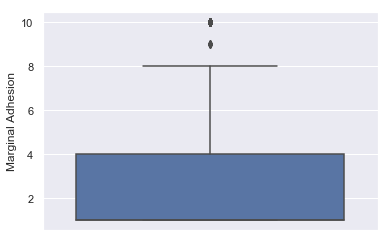

In [100]:
sns.boxplot(y='Marginal Adhesion', data=dfCancer)

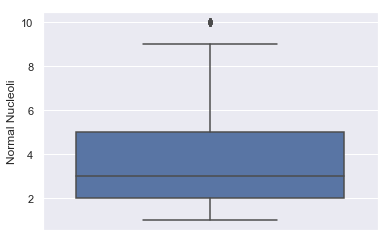

In [101]:
sns.boxplot(y='Normal Nucleoli',data=dfCancer)

In [129]:
#remove outliers
dfCancer = dfCancer[(np.abs(stats.zscore(dfCancer)) < 3).all(axis=1)]
dfCancer.shape

(648, 10)

In [105]:
X =  dfCancer.drop("Class", axis=1)
y =  dfCancer.pop("Class")
#standardize dat 
X_std = StandardScaler().fit_transform(X)

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [106]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015456  0.61818427 0.62410239 0.47976788 0.4926424  0.57650829
  0.54825598 0.51849178 0.36470893]
 [0.61818427 1.0015456  0.90086598 0.69283943 0.73308212 0.67637148
  0.74671627 0.73094613 0.43155367]
 [0.62410239 0.90086598 1.0015456  0.67104351 0.70690496 0.68962935
  0.73080354 0.72309852 0.38961603]
 [0.47976788 0.69283943 0.67104351 1.0015456  0.59795509 0.68575821
  0.6510195  0.59378187 0.38750453]
 [0.4926424  0.73308212 0.70690496 0.59795509 1.0015456  0.59413265
  0.62686014 0.66848411 0.40724077]
 [0.57650829 0.67637148 0.68962935 0.68575821 0.59413265 1.0015456
  0.65916743 0.56133266 0.41411613]
 [0.54825598 0.74671627 0.73080354 0.6510195  0.62686014 0.65916743
  1.0015456  0.66758427 0.32865685]
 [0.51849178 0.73094613 0.72309852 0.59378187 0.66848411 0.56133266
  0.66758427 1.0015456  0.39706679]
 [0.36470893 0.43155367 0.38961603 0.38750453 0.40724077 0.41411613
  0.32865685 0.39706679 1.0015456 ]]


In [107]:
cov_matrix.shape

(9, 9)

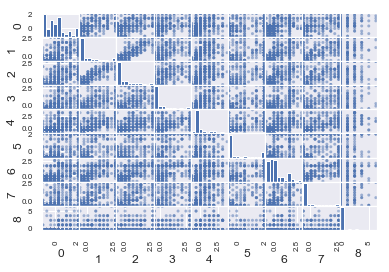

In [109]:
#plotting scatter matrix
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.show()

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [110]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals

array([5.82203615, 0.76965166, 0.56855275, 0.51564015, 0.09661838,
       0.35306537, 0.27645783, 0.31166042, 0.30022764])

In [111]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.2984365   0.04553224  0.84403487 -0.28511636 -0.00398401  0.06750236
  -0.20352908 -0.2349328   0.11826378]
 [-0.38042723 -0.10319707 -0.06832919 -0.14972004 -0.73068373  0.00822344
   0.1025499   0.06434122 -0.51857295]
 [-0.37563843 -0.15289024 -0.01034446 -0.14758352  0.67213995  0.01322309
   0.2622203   0.08570831 -0.53439693]
 [-0.33331526 -0.05242438 -0.13776831  0.60715475  0.04659558 -0.04800634
  -0.2987843  -0.62741542 -0.10553534]
 [-0.33756879 -0.02923589 -0.34940432 -0.24533188  0.04802847  0.73413446
  -0.29634573  0.0652377   0.26378887]
 [-0.33804338  0.01197799  0.21917282  0.53670357 -0.07270728  0.21374553
   0.54839392  0.31393755  0.31500726]
 [-0.34722517 -0.22947627 -0.03489352  0.09031837  0.04732239 -0.47404439
  -0.50705569  0.55088921  0.17279605]
 [-0.33982375 -0.075639   -0.28656347 -0.38628933 -0.01969863 -0.40820448
   0.37484782 -0.35107458  0.4654861 ]
 [-0.22301564  0.94961814 -0.10194536 -0.01610837  0.04383634 -0.13002616
  -0

In [112]:
#visualising eigen values and their corresponding vectors
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [114]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_pairs_sorted

[(5.8220361543228565,
  array([-0.2984365 , -0.38042723, -0.37563843, -0.33331526, -0.33756879,
         -0.33804338, -0.34722517, -0.33982375, -0.22301564])),
 (0.7696516614902922,
  array([ 0.04553224, -0.10319707, -0.15289024, -0.05242438, -0.02923589,
          0.01197799, -0.22947627, -0.075639  ,  0.94961814])),
 (0.5685527494831644,
  array([ 0.84403487, -0.06832919, -0.01034446, -0.13776831, -0.34940432,
          0.21917282, -0.03489352, -0.28656347, -0.10194536])),
 (0.5156401476647319,
  array([-0.28511636, -0.14972004, -0.14758352,  0.60715475, -0.24533188,
          0.53670357,  0.09031837, -0.38628933, -0.01610837])),
 (0.3530653651469089,
  array([ 0.06750236,  0.00822344,  0.01322309, -0.04800634,  0.73413446,
          0.21374553, -0.47404439, -0.40820448, -0.13002616])),
 (0.3116604235972602,
  array([-0.2349328 ,  0.06434122,  0.08570831, -0.62741542,  0.0652377 ,
          0.31393755,  0.55088921, -0.35107458,  0.10062672])),
 (0.3002276416542144,
  array([ 0.118263

# Q8 Find variance and cumulative variance by each eigen vector

In [117]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(" Variance ", var_exp)


 Variance  [64.58946145142131, 8.538488082719812, 6.30750392516474, 5.720493407734599, 3.9168945687594348, 3.4575496239270835, 3.330714748804473, 3.067013324205166, 1.0718808672633908]


In [118]:
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.58946145  73.12794953  79.43545346  85.15594687  89.07284144
  92.53039106  95.86110581  98.92811913 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [136]:
dfCancer.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [135]:
dfCancer.shape

(648, 10)

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli'])

In [138]:
finalDf = pd.concat([principalDf, dfCancer['Class']], axis = 1)
finalDf.head(15)

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0        -1.296129  -0.025530   -0.627783           0.246213   
1         2.078452  -0.473131    0.276395          -0.856315   
2        -1.420816  -0.055959   -0.062900          -0.120519   
3         1.965820  -0.833086   -0.114659           1.612598   
4        -1.152340  -0.082548   -0.208454          -0.324024   
5         5.965397  -1.784433    0.256989          -0.143749   
6        -0.863930  -0.062237    0.060081          -1.569369   
7        -1.489800  -0.133091    0.318075          -0.017230   
8        -0.757310   5.138856    0.821739           0.092495   
9        -1.422543   0.021212   -0.304456           0.233923   
10       -1.948124  -0.075283    0.413067          -0.329158   
11       -1.781944   0.024591    0.298887          -0.032274   
12        0.216487  -0.427068   -0.275461           0.056401   
13       -1.545503  -0.086388    0.501984          -0.487251   
14        5.047967   2.784222    0.473899          -0.937060   

    Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Class  
0                     -0.154309     0.075225        -0.211573    2.0  
1                      2.467655     0.172851        -0.685313    2.0  
2                     -0.142969     0.340453        -0.214310    2.0  
3                     -0.294492    -0.052719         1.031129    2.0  
4                     -0.216123    -0.317027        -0.086895    2.0  
5                      0.569738     0.360926         0.346384    4.0  
6                      0.299331     1.238652        -0.852175    2.0  
7                     -0.224740     0.369240         0.118751    2.0  
8                     -0.499061     0.384032         0.446784    2.0  
9                      0.032064    -0.056463         0.095654    2.0  
10                    -0.706864     0.384657         0.126867    2.0  
11                    -0.021131     0.095112        -0.003573    2.0  
12                    -0.689258    -0.239814        -0.106021    4.0  
13                    -0.131629     0.605681        -0.217048    2.0  
14                     1.043005    -0.762978        -0.124890    4.0

In [139]:
pca.explained_variance_ratio_

array([0.64589461, 0.08538488, 0.06307504, 0.05720493, 0.03916895,
       0.0345755 , 0.03330715])

# Q10 Find correlation between components and features

In [140]:
pca.components_

array([[ 0.2984365 ,  0.38042723,  0.37563843,  0.33331526,  0.33756879,
         0.33804338,  0.34722517,  0.33982375,  0.22301564],
       [ 0.04553224, -0.10319707, -0.15289024, -0.05242438, -0.02923589,
         0.01197799, -0.22947627, -0.075639  ,  0.94961814],
       [-0.84403487,  0.06832919,  0.01034446,  0.13776831,  0.34940432,
        -0.21917282,  0.03489352,  0.28656347,  0.10194536],
       [ 0.28511636,  0.14972004,  0.14758352, -0.60715475,  0.24533188,
        -0.53670357, -0.09031837,  0.38628933,  0.01610837],
       [ 0.06750236,  0.00822344,  0.01322309, -0.04800634,  0.73413446,
         0.21374553, -0.47404439, -0.40820448, -0.13002616],
       [-0.2349328 ,  0.06434122,  0.08570831, -0.62741542,  0.0652377 ,
         0.31393755,  0.55088921, -0.35107458,  0.10062672],
       [-0.11826378,  0.51857295,  0.53439693,  0.10553534, -0.26378887,
        -0.31500726, -0.17279605, -0.4654861 ,  0.0709088 ]])

In [209]:
finalDf.head(5)

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0       -1.296129  -0.025530   -0.627783           0.246213   
1        2.078452  -0.473131    0.276395          -0.856315   
2       -1.420816  -0.055959   -0.062900          -0.120519   
3        1.965820  -0.833086   -0.114659           1.612598   
4       -1.152340  -0.082548   -0.208454          -0.324024   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Class  
0                    -0.154309     0.075225        -0.211573    2.0  
1                     2.467655     0.172851        -0.685313    2.0  
2                    -0.142969     0.340453        -0.214310    2.0  
3                    -0.294492    -0.052719         1.031129    2.0  
4                    -0.216123    -0.317027        -0.086895    2.0

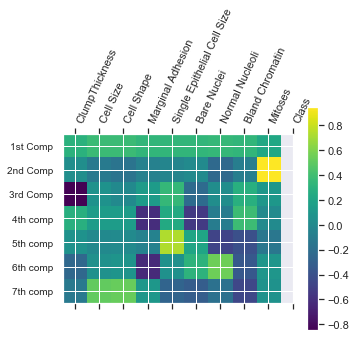

In [213]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6],['1st Comp','2nd Comp','3rd Comp','4th comp','5th comp','6th comp','7th comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(dfCancer.columns)),dfCancer.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()#

In [211]:
len(dfCancer.columns)

10

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [142]:
dfJokes= pd.read_csv('jokes.csv')
dfJokes.head(5)

NumJokes  Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  \
0        74  -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17  -8.98   
1       100   4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88   
2        49  99.00  99.00  99.00  99.00   9.03   9.27   9.03   9.27  99.00   
3        48  99.00   8.35  99.00  99.00   1.80   8.16  -2.82   6.21  99.00   
4        91   8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44   

   ...  Joke91  Joke92  Joke93  Joke94  Joke95  Joke96  Joke97  Joke98  \
0  ...    2.82   99.00   99.00   99.00   99.00   99.00   -5.63   99.00   
1  ...    2.82   -4.95   -0.29    7.86   -0.19   -2.14    3.06    0.34   
2  ...   99.00   99.00   99.00    9.08   99.00   99.00   99.00   99.00   
3  ...   99.00   99.00   99.00    0.53   99.00   99.00   99.00   99.00   
4  ...    5.19    5.58    4.27    5.19    5.73    1.55    3.11    6.55   

   Joke99  Joke100  
0   99.00    99.00  
1   -4.32     1.07  
2   99.00    99.00  
3   99.00    99.00  
4    1.80     1.60  

[5 rows x 101 columns]

In [143]:
dfJokes.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [167]:
ratings = dfJokes.iloc[0:200,1:]

In [168]:
ratings.shape

(200, 100)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [169]:
ratings.replace(99,0,inplace = True)


In [170]:
ratings.head(10)

Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  ...  \
0  -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17  -8.98   -4.76  ...   
1   4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88    9.22  ...   
2   0.00   0.00   0.00   0.00   9.03   9.27   9.03   9.27   0.00    0.00  ...   
3   0.00   8.35   0.00   0.00   1.80   8.16  -2.82   6.21   0.00    1.84  ...   
4   8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44    5.73  ...   
5  -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87  -6.65   -1.80  ...   
6   0.00   0.00   0.00   0.00   8.59  -9.85   7.72   8.79   0.00    0.00  ...   
7   6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41  -5.19   -4.42  ...   
8  -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93  -7.86   -1.60  ...   
9   3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   3.01    8.16  ...   

   Joke91  Joke92  Joke93  Joke94  Joke95  Joke96  Joke97  Joke98  Joke99  \
0    2.82    0.00    0.00    0.00    0.00    0.00   -5.63    0.00    0.00   
1    2.82   -4.95   -0.29    7.86   -0.19   -2.14    3.06    0.34   -4.32   
2    0.00    0.00    0.00    9.08    0.00    0.00    0.00    0.00    0.00   
3    0.00    0.00    0.00    0.53    0.00    0.00    0.00    0.00    0.00   
4    5.19    5.58    4.27    5.19    5.73    1.55    3.11    6.55    1.80   
5   -3.54   -6.89   -0.68   -2.96   -2.18   -3.35    0.05   -9.08   -5.05   
6    0.00    0.00    0.00    0.00    0.00    2.33    0.00    0.00    0.00   
7    7.23   -1.12   -0.10   -5.68   -3.16   -3.35    2.14   -0.05    1.31   
8    4.37   -0.29    4.17   -0.29   -0.29   -0.29   -0.29   -0.29   -3.40   
9    0.00    4.47    0.00    0.00    0.00    0.00    0.00    0.00    0.00   

   Joke100  
0     0.00  
1     1.07  
2     0.00  
3     0.00  
4     1.60  
5    -3.45  
6     0.00  
7     0.00  
8    -4.95  
9     0.00  

[10 rows x 100 columns]

In [172]:
ratings.shape

(200, 100)

 # Q22 Change the column indices from 0 to 99

In [173]:
rangecol= np.arange(0,100)
rangecol.shape

(100,)

In [174]:
ratings.columns=rangecol

In [176]:
ratings.head(5)

0     1     2     3     4     5     6     7     8     9   ...    90  \
0 -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...  2.82   
1  4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...  2.82   
2  0.00  0.00  0.00  0.00  9.03  9.27  9.03  9.27  0.00  0.00  ...  0.00   
3  0.00  8.35  0.00  0.00  1.80  8.16 -2.82  6.21  0.00  1.84  ...  0.00   
4  8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  5.73  ...  5.19   

     91    92    93    94    95    96    97    98    99  
0  0.00  0.00  0.00  0.00  0.00 -5.63  0.00  0.00  0.00  
1 -4.95 -0.29  7.86 -0.19 -2.14  3.06  0.34 -4.32  1.07  
2  0.00  0.00  9.08  0.00  0.00  0.00  0.00  0.00  0.00  
3  0.00  0.00  0.53  0.00  0.00  0.00  0.00  0.00  0.00  
4  5.58  4.27  5.19  5.73  1.55  3.11  6.55  1.80  1.60  

[5 rows x 100 columns]

# Q24 Normalize the ratings using StandardScaler and save them in ratings_diff variable

In [178]:
from sklearn.preprocessing import StandardScaler
ratings_diff=  StandardScaler().fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

In [180]:
ratings_std=pd.DataFrame(ratings_diff)
ratings_std

0         1         2         3         4         5         6   \
0   -1.857016  1.671649 -2.219181 -1.935298 -1.380394 -2.240830 -1.785253   
1    0.789494 -0.180277  1.372710  1.315712 -0.432101 -2.505530 -0.160595   
2   -0.117881 -0.121130 -0.053284  0.181880  1.672963  1.814094  1.578074   
3   -0.117881  1.581908 -0.053284  0.181880  0.339079  1.560803 -0.532913   
4    1.772484  0.819110 -0.988252 -1.216599  0.257903  0.063882  1.223570   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.156447 -0.121130 -0.183328  0.635932  0.534642  1.348587  0.332859   
196  0.282432  0.978197  1.753872  0.155934  0.894403  0.762141 -1.293580   
197  0.464796 -0.894126 -0.315613  0.067719 -0.181190  0.851135 -0.687896   
198 -0.117881 -0.121130 -0.053284  0.181880  1.466331 -0.301221  0.617887   
199  1.123088 -1.605934 -1.075695  0.874633  1.368549  0.196231  0.350673   

           7         8         9   ...        90        91        92  \
0    0.877475 -2.233712 -1.132409  ...  0.772232 -0.055329 -0.362193   
1   -1.083559  2.200591  1.667223  ...  0.772232 -1.619456 -0.453066   
2    1.929134 -0.004146 -0.179172  ... -0.192459 -0.055329 -0.362193   
3    1.298139 -0.004146  0.189306  ... -0.192459 -0.055329 -0.362193   
4    0.968206 -0.113390  0.968316  ...  1.582983  1.707868  0.975838   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.862917  0.768008  1.250683  ...  0.389092  1.417162  0.154845   
196 -1.574333  0.912012  0.715989  ... -0.192459 -0.055329 -0.362193   
197  0.467122  0.815182 -0.325362  ...  0.289886 -0.851612 -0.528272   
198 -0.372143 -0.004146 -0.179172  ...  0.820125 -0.055329 -0.362193   
199  0.477432  1.381263 -1.082344  ... -0.192459 -0.055329 -0.362193   

           93        94        95        96        97        98        99  
0   -0.184043 -0.175922 -0.140401 -1.973424 -0.026858 -0.041444 -0.160954  
1    2.083674 -0.233389 -0.859977  0.712411  0.070600 -1.367650  0.167461  
2    2.435660 -0.175922 -0.140401 -0.233349 -0.026858 -0.041444 -0.160954  
3   -0.031131 -0.175922 -0.140401 -0.233349 -0.026858 -0.041444 -0.160954  
4    1.313343  1.557140  0.380786  0.727864  1.850639  0.511142  0.330133  
..        ...       ...       ...       ...       ...       ...       ...  
195  1.425863  1.557140  1.036474 -0.233349 -0.611605  0.851903  0.403797  
196 -0.184043 -0.175922 -0.140401 -0.233349 -0.026858 -0.041444 -0.160954  
197 -0.729333  0.177949 -0.826352 -0.594963 -0.236106  0.182660 -0.025905  
198 -0.184043 -0.175922 -0.140401 -0.233349 -0.026858 -0.041444 -0.160954  
199 -0.184043 -0.175922 -0.140401 -0.233349 -0.026858 -0.041444 -0.160954  

[200 rows x 100 columns]

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [182]:
dfMean=ratings_std.mean()
dfMean

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
          ...     
95    2.858824e-17
96   -2.137179e-17
97    1.198694e-16
98    1.840889e-16
99    7.549517e-17
Length: 100, dtype: float64

In [185]:
dfMean.reset_index()

index             0
0       0 -1.110223e-17
1       1 -9.658940e-17
2       2 -4.107825e-17
3       3  3.719247e-17
4       4 -8.881784e-18
..    ...           ...
95     95  2.858824e-17
96     96 -2.137179e-17
97     97  1.198694e-16
98     98  1.840889e-16
99     99  7.549517e-17

[100 rows x 2 columns]

In [188]:
dfMean_= pd.DataFrame(dfMean)

In [189]:
dfMean_

0
0  -1.110223e-17
1  -9.658940e-17
2  -4.107825e-17
3   3.719247e-17
4  -8.881784e-18
..           ...
95  2.858824e-17
96 -2.137179e-17
97  1.198694e-16
98  1.840889e-16
99  7.549517e-17

[100 rows x 1 columns]

In [190]:
dfMean_.reset_index()

index             0
0       0 -1.110223e-17
1       1 -9.658940e-17
2       2 -4.107825e-17
3       3  3.719247e-17
4       4 -8.881784e-18
..    ...           ...
95     95  2.858824e-17
96     96 -2.137179e-17
97     97  1.198694e-16
98     98  1.840889e-16
99     99  7.549517e-17

[100 rows x 2 columns]

In [195]:
#df.sort_values(by=['col1'])
dfMean_.columns

RangeIndex(start=0, stop=1, step=1)

In [198]:
dfMean_.columns=['mean vals']

In [200]:
dfMean_.reset_index(inplace=True)

In [204]:
results=dfMean_.sort_values(by=['mean vals'])

In [205]:
retresults = results.iloc[0:10,0]

In [206]:
retresults

84    84
15    15
31    31
1      1
71    71
11    11
86    86
34    34
93    93
79    79
Name: index, dtype: int64